In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

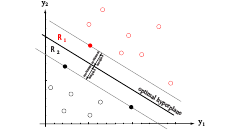

Fig.19: Training a Support Vector Machine consists of ﬁnding the optimal hyperplane, i.e., the one with the maximum distance from the nearest training patterns. The support vectors are those (nearest) patterns, a distance b from the hyperplane. The three support vectors are shown in solid dots.

##  Support Vector Machines

We have seen how to train linear machines with margins. Support Vector Machines (SVMs) are motivated by many of the same considerations, but rely on preprocessing the data to represent patterns in a high dimension — typically much higher than the original feature space. With an appropriate nonlinear mapping $\phi(\cdot)$ to a sufficiently high dimension, data from two categories can always be separated by a hyperplane (Problem 27). 

Here we assume each pattern $x_k$ has been transformed to $y_k = \phi(x_k)$; we return to the choice of $\phi(\cdot)$ below. For each of the $n$ patterns, $k = 1, 2, \dots, n$, we let $z_k = \pm 1$, according to whether pattern $k$ is in $\omega_1$ or $\omega_2$. A linear discriminant in an augmented $y$-space is:

$$
g(y) = a^T y \tag{104}
$$

where both the weight vector and the transformed pattern vector are augmented (by \(a_0 = w_0\) and \(y_0 = 1\), respectively). Thus, a separating hyperplane ensures:

$$
z_k g(y_k) \geq 1, \quad k = 1, \dots, n. \tag{105}
$$

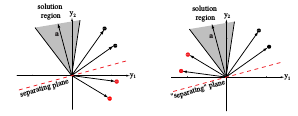

Fig.8: Four training samples (black for ω1 , red for ω2 ) and the solution region in feature space. The ﬁgure on the left shows the raw data; the solution vectors leads to a plane that separates the patterns from the two categories. In the ﬁgure on the right, the red points have been “normalized” — i.e., changed in sign. Now the solution vector leads to a plane that places all “normalized” points on the same side.

Much as was shown in Fig.8, in Sect. ??, the margin was any positive distance from the decision hyperplane. The goal in training a Support Vector Machine is to find the separating hyperplane with the largest margin. We expect that the larger the margin, the better the generalization of the classifier. 

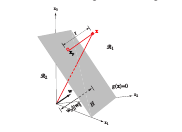

Fig.2: The linear decision boundary H, where g(x) = wt x + w0 = 0, separates the feature space into two half-spaces R1 (where g(x) > 0) and R2 (where g(x) < 0).

As illustrated in Fig. 5.2, the distance from any hyperplane to a (transformed) pattern $y$ is:

$$
\frac{|g(y)|}{||a||},
$$

and assuming that a positive margin $b$ exists, Eq. 105 implies:

$$
z_k g(y_k) \geq b, \quad k = 1, \dots, n; \quad \frac{1}{||a||}.
$$

The goal is to find the weight vector $a$ that maximizes $b$. Of course, the solution vector can be scaled arbitrarily and still preserve the hyperplane, and thus to ensure uniqueness, we impose the constraint:

$$
b ||a|| = 1.
$$

That is, we demand the solution to Eqs. 104 & 105 also minimize $||a||^2$. The support vectors are the (transformed) training patterns for which Eq. 105 represents an equality — that is, the support vectors are (equally) close to the hyperplane (Fig.19). The support vectors are the training samples that define the optimal separating hyperplane and are the most difficult patterns to classify. Informally speaking, they are the patterns most informative for the classification task. 

If \(N_s\) denotes the total number of support vectors, then for \(n\) training patterns the expected value of the generalization error rate is bounded, according to:

$$
E_n[N_s] \leq \frac{1}{n} \quad \text{(Error Rate Bound)}. \tag{107}
$$

This bound is independent of the dimensionality of the space of transformed vectors, determined by $\phi(\cdot)$. We will return to this equation in Chap. ??, but for now we can understand this informally by means of the leave-one-out bound. Suppose we have $n$ points in the training set, and train a leave-one-out Support Vector Machine on $n-1$ of them, and test on the single remaining point. If that remaining point happens to be a support vector for the full $n$ sample case, then there will be an error; otherwise, there will not. Note that if we can find a transformation $\phi(\cdot)$ that well separates the data — so the expected number of support vectors is small — then Eq. 107 shows that the expected error rate will be lower.

### SVM Training

We now turn to the problem of training an SVM. The first step is, of course, to choose the nonlinear $\phi$-functions that map the input to a higher dimensional space. Often this choice will be informed by the designer’s knowledge of the problem domain. In the absence of such information, one might choose to use polynomials, Gaussians, or other basis functions. The dimensionality of the mapped space can be arbitrarily high (though in practice, it may be limited by computational resources).

We begin by recasting the problem of minimizing the magnitude of the weight vector constrained by the separation into an unconstrained problem by the method of Lagrange undetermined multipliers. Thus, from Eq. 106 and our goal of minimizing $||a||$, we construct the functional:

$$
L(a, \alpha) = \frac{1}{2} ||a||^2 - \sum_{k=1}^{n} \alpha_k [z_k a^T y_k - 1]. \tag{108}
$$

We seek to minimize $L(\cdot)$ with respect to the weight vector $a$, and maximize it with respect to the undetermined multipliers $\alpha_k \geq 0$. The last term in Eq. 108 expresses the goal of classifying the points correctly. It can be shown using the Kuhn-Tucker construction that this optimization can be reformulated as:

$$
L(\alpha) = \sum_{k=1}^{n} \alpha_k - \frac{1}{2} \sum_{k,j=1}^{n} \alpha_k \alpha_j z_k z_j y_k^T y_j, \tag{109}
$$

subject to the constraints:

$$
\sum_{k=1}^{n} z_k \alpha_k = 0, \quad \alpha_k \geq 0, \quad k = 1, 2, \dots, n. \tag{110}
$$

Given the training data, these equations can be solved using quadratic programming, or other alternate schemes.

### Example 2: SVM for the XOR Problem

The exclusive-OR is the simplest problem that cannot be solved using a linear discriminant operating directly on the features. The points $k = 1, 3$ at $x = (1, 1)^T$ and $(-1, -1)^T$ are in category $\omega_1$ (red in the figure), while $k = 2, 4$ at $x = (1, -1)^T$ and $(-1, 1)^T$ are in $\omega_2$ (black in the figure). Following the approach of Support Vector Machines, we preprocess the features to map them to a higher-dimensional space where they can be linearly separated.

While many $\phi(\cdot)$-functions could be used, here we use the simplest expansion up to second order:

$$
1, 2x_1, 2x_2, 2x_1 x_2, x_1^2, x_2^2,
$$

where the factor of 2 is convenient for normalization. We seek to maximize:

$$
L(\alpha) = \sum_{k=1}^{4} \alpha_k - \frac{1}{2} \sum_{k,j=1}^{4} \alpha_k \alpha_j z_k z_j y_k^T y_j,
$$

subject to the constraints:

$$
\alpha_1 - \alpha_2 + \alpha_3 - \alpha_4 = 0, \quad 0 \leq \alpha_k \quad \text{for} \quad k = 1, 2, 3, 4.
$$

It is clear from the symmetry of the problem that \(\alpha_1 = \alpha_3\) and \(\alpha_2 = \alpha_4\) at the solution. While we could use iterative gradient descent as described in Sect. 5.9, for this small problem, we can use analytic techniques instead. The solution is:

$$
\alpha^*_k = \frac{1}{8}, \quad k = 1, 2, 3, 4.
$$

From the last term in Eq. 108, this implies that all four training patterns are support vectors — an unusual case due to the highly symmetric nature of the XOR problem. The final discriminant function is:

$$
g(x) = x_1 x_2,
$$

and the decision hyperplane is defined by \(g = 0\), which properly classifies all training patterns. The margin is easily computed from the solution \(||a||\) and is found to be:

$$
b = \frac{1}{||a||} = 2.
$$


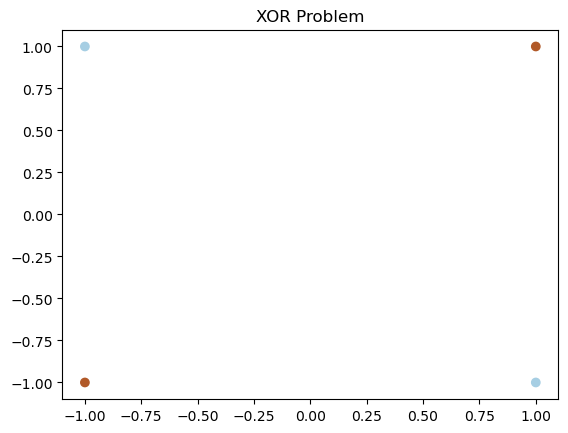

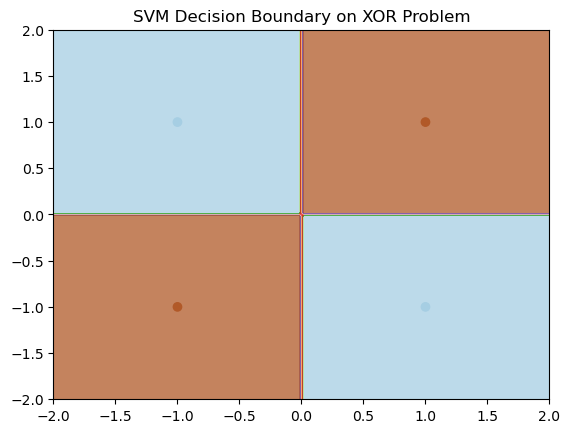

Predictions: [ 1 -1 -1  1]
Actual labels: [ 1 -1 -1  1]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the XOR dataset manually
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
y = np.array([1, -1, -1, 1])  # Labels for XOR

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('XOR Problem')
plt.show()

# Create a Support Vector Machine with RBF kernel
svm_model = svm.SVC(kernel='rbf', C=1, gamma='auto')  # Using RBF kernel

# Train the model on the XOR dataset
svm_model.fit(X, y)

# Create a grid to evaluate the decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points and the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('SVM Decision Boundary on XOR Problem')
plt.show()

# Predicting for each point
predictions = svm_model.predict(X)

# Print predictions
print("Predictions:", predictions)
print("Actual labels:", y)


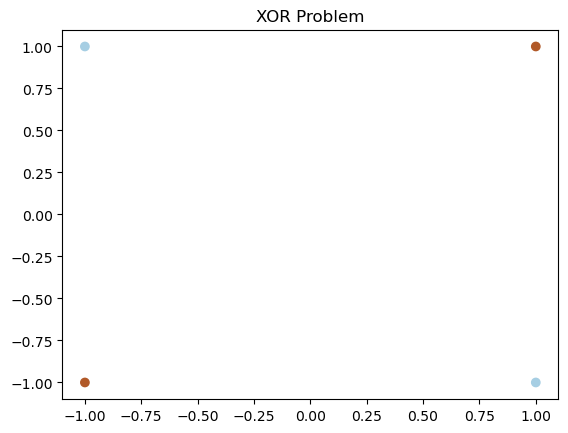

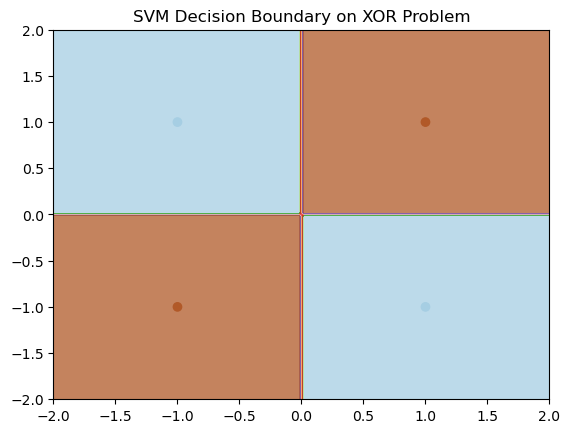

Predictions: [ 1 -1 -1  1]
Actual labels: [ 1 -1 -1  1]


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the XOR dataset manually
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
y = np.array([1, -1, -1, 1])  # Labels for XOR

# Visualize the XOR data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('XOR Problem')
plt.show()

# Create a Support Vector Machine with RBF kernel
svm_model = svm.SVC(kernel='rbf', C=1, gamma='auto')  # Using RBF kernel

# Train the model on the XOR dataset
svm_model.fit(X, y)

# Create a grid to evaluate the decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points and the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('SVM Decision Boundary on XOR Problem')
plt.show()

# Predicting for each point in the XOR dataset
predictions = svm_model.predict(X)

# Print predictions
print("Predictions:", predictions)
print("Actual labels:", y)


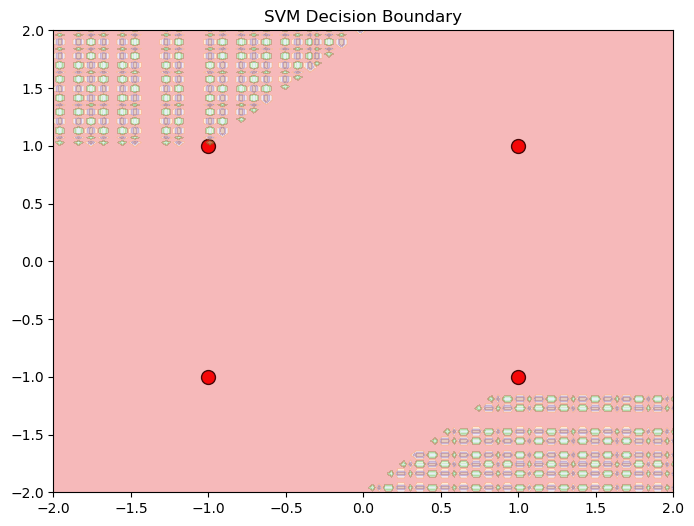

Predictions: [0.0, 0.0, 0.0, 0.0]
Actual labels: [1, -1, -1, 1]


In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the XOR dataset manually
X = [[1, 1], [1, -1], [-1, 1], [-1, -1]]  # Input data
y = [1, -1, -1, 1]  # Labels for XOR problem

# Define the kernel function (here we use a linear kernel as an example)
def linear_kernel(x1, x2):
    return sum(x1[i] * x2[i] for i in range(len(x1)))

# Define a function for training the SVM using the Sequential Minimal Optimization (SMO) algorithm
def smo(X, y, C, tol, max_iter):
    n = len(X)
    alphas = [0] * n  # Initialize the Lagrange multipliers (alphas)
    b = 0  # Initialize the bias term
    iter = 0

    def compute_error(i):
        return sum(alphas[j] * y[j] * linear_kernel(X[i], X[j]) for j in range(n)) + b - y[i]

    while iter < max_iter:
        alpha_changed = 0
        for i in range(n):
            error_i = compute_error(i)
            if (y[i] * error_i < -tol and alphas[i] < C) or (y[i] * error_i > tol and alphas[i] > 0):
                # Select a random index j != i
                j = i
                while j == i:
                    j = random.randint(0, n - 1)
                error_j = compute_error(j)
                
                # Store old alphas
                alpha_i_old = alphas[i]
                alpha_j_old = alphas[j]
                
                # Compute the bounds
                if y[i] != y[j]:
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[i] + alphas[j] - C)
                    H = min(C, alphas[i] + alphas[j])
                
                if L == H:
                    continue
                
                # Compute eta
                eta = 2 * linear_kernel(X[i], X[j]) - linear_kernel(X[i], X[i]) - linear_kernel(X[j], X[j])
                if eta >= 0:
                    continue
                
                # Update alpha_j
                alphas[j] -= y[j] * (error_i - error_j) / eta
                alphas[j] = max(L, min(alphas[j], H))
                
                if abs(alphas[j] - alpha_j_old) < 1e-5:
                    continue
                
                # Update alpha_i
                alphas[i] += y[i] * y[j] * (alpha_j_old - alphas[j])
                
                # Compute the b terms
                b1 = b - error_i - y[i] * (alphas[i] - alpha_i_old) * linear_kernel(X[i], X[i]) - y[j] * (alphas[j] - alpha_j_old) * linear_kernel(X[i], X[j])
                b2 = b - error_j - y[i] * (alphas[i] - alpha_i_old) * linear_kernel(X[i], X[j]) - y[j] * (alphas[j] - alpha_j_old) * linear_kernel(X[j], X[j])
                if 0 < alphas[i] < C:
                    b = b1
                elif 0 < alphas[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2
                
                alpha_changed += 1
        
        iter += 1
        if alpha_changed == 0:
            break
    
    return alphas, b

# Train the SVM using the SMO algorithm
import random
C = 1.0  # Regularization parameter
tol = 0.001  # Tolerance
max_iter = 100  # Maximum iterations
alphas, b = smo(X, y, C, tol, max_iter)

# Plot the decision boundary
def plot_decision_boundary(X, y, alphas, b):
    plt.figure(figsize=(8, 6))
    
    # Find the support vectors (those with non-zero alphas)
    support_vectors = [i for i in range(len(alphas)) if alphas[i] > 0]
    
    # Plot the support vectors
    for i in support_vectors:
        plt.scatter(X[i][0], X[i][1], c='r', s=100, marker='o', edgecolors='k')
    
    # Plot the rest of the points
    for i in range(len(X)):
        if i not in support_vectors:
            plt.scatter(X[i][0], X[i][1], c='b', s=50, marker='x')
    
    # Draw the decision boundary
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = []
    for i in range(len(xx.ravel())):
        xi = np.array([xx.ravel()[i], yy.ravel()[i]])
        z = sum(alphas[j] * y[j] * linear_kernel(X[j], xi) for j in range(len(X))) + b
        Z.append(np.sign(z))
    Z = np.array(Z).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, alphas, b)

# Prediction function for SVM
def predict(X, alphas, b):
    predictions = []
    for i in range(len(X)):
        prediction = sum(alphas[j] * y[j] * linear_kernel(X[j], X[i]) for j in range(len(X))) + b
        predictions.append(np.sign(prediction))
    return predictions

# Test predictions
predictions = predict(X, alphas, b)
print("Predictions:", predictions)
print("Actual labels:", y)


## XOR Problem and Support Vector Machines

## 1. The XOR Problem in the Original Feature Space
The XOR problem in the original $ x_1 - x_2 $ feature space is shown below:

- The two red patterns are in category $ \omega_1 $ and the two black patterns are in $ \omega_2 $.
- These four training patterns $ x $ are mapped to a six-dimensional space defined by $ x_1, x_2, x_1^2, x_2^2, 2x_1x_2 $.

In this new space, the optimal hyperplane is found to be:

$$
g(x_1, x_2) = x_1 x_2 = 0
$$

The margin $ b = 2 $. A two-dimensional projection of this six-dimensional space is shown on the right, where the support vectors lie on the hyperplanes:

$$
2x_1 x_2 = \pm 1
$$

In the original feature space, these correspond to the hyperbolas $ x_1 x_2 = \pm 1 $.

##  Multicategory Generalizations

###  Kesler's Construction
There is no uniform way to extend all of the two-category procedures to the multicategory case. In Section 5.2.2, we defined a multicategory classifier called a **linear machine** which classifies a pattern by computing $ c $ linear discriminant functions:

$$
g_i(x) = w_i^t x + w_{i0}, \quad i = 1, \ldots, c
$$

where $ x $ is assigned to the category corresponding to the largest discriminant function.

This can be extended to the multiclass case by considering:

$$
y(x) = [y_1(x), y_2(x), \dots, y_d(x)]
$$

and writing:

$$
g_i(x) = a_i^t y, \quad i = 1, \ldots, c
$$

where $ x $ is assigned to category $ \omega_i $ if $ g_i(x) > g_j(x) $ for all $ j \neq i $.

#### Linearly Separable Multicategory Case
Suppose we have a set of labeled samples $ y_1, y_2, \ldots, y_n $ where the $ n_1 $ samples belong to class $ \omega_1 $, the $ n_2 $ samples belong to class $ \omega_2 $, and so on. These samples are **linearly separable** if there exists a linear machine that classifies all samples correctly. In other words, there exists a set of weight vectors $ \hat{a}_1, \hat{a}_2, \dots, \hat{a}_c $ such that for all $ y_k \in Y_i $, we have:

$$
\hat{a}_i^t y_k > \hat{a}_j^t y_k, \quad \forall j \neq i
$$

#### Reducing Multicategory Problem to Two-Category Problem

If $ y \in Y_1 $, we can express the requirement as:

$$
\hat{a}_i^t y_k - \hat{a}_j^t y_k > 0, \quad \forall j \neq i
$$

This set of $ c - 1 $ inequalities can be thought of as requiring a new set of weight vectors that classifies the patterns of $ \omega_1 $ and $ \omega_j $ for all $ j \neq i $. By using **Kesler's construction**, we construct new training samples $ \eta_{ij} $ corresponding to normalized patterns, where each sample is partitioned into $ c $ subvectors.

###  Convergence of the Fixed-Increment Rule

The **fixed-increment rule** for a linear machine is described as follows:

Suppose we have a set of $ n $ linearly-separable samples $ y_1, \dots, y_n $. Starting with an arbitrary linear machine, we want to use the sequence of samples to construct a sequence of linear machines that converge to a solution machine. The rule for correction is:

If the current machine misclassifies $ y_k $, then:

$$
\hat{a}_i(k + 1) = \hat{a}_i(k) + y_k, \quad \hat{a}_j(k + 1) = \hat{a}_j(k) - y_k, \quad \forall l \neq i, j
$$

This means:
- The weight vector for the correct category is incremented by the pattern.
- The weight vector for the incorrectly chosen category is decremented.
- All other weight vectors remain unchanged.

By applying Kesler's construction, the multicategory problem can be reduced to a series of two-category problems, ensuring that the process terminates in a solution after a finite number of corrections.

## Conclusion

Kesler's construction and the use of a fixed-increment rule allow for the extension of two-category classifiers to the multicategory case. By manipulating the weight vectors and constructing new training samples, we can reduce the complexity of multicategory problems and apply two-category learning techniques effectively.


In [4]:
import random
import math

# XOR function to create the dataset
def generate_xor_data():
    # XOR problem with 2 input variables and binary outputs
    # Format: (x1, x2) -> label
    return [
        ([1, 1], 0),
        ([1, 0], 1),
        ([0, 1], 1),
        ([0, 0], 0)
    ]

# Mapping XOR data to a higher-dimensional space
def map_to_higher_dimension(x1, x2):
    return [
        x1,  # original x1
        x2,  # original x2
        x1**2,  # x1 squared
        x2**2,  # x2 squared
        2*x1*x2  # interaction term (x1 * x2)
    ]

# Linear machine classifier for multiclass classification
class LinearMachine:
    def __init__(self, num_classes, dim):
        self.num_classes = num_classes
        self.dim = dim
        # Initialize weight vectors for each class (weights are random for simplicity)
        self.weights = [[random.uniform(-1, 1) for _ in range(dim)] for _ in range(num_classes)]
    
    def predict(self, x):
        # Predict the class with the highest score (discriminant function)
        scores = [sum(w * xi for w, xi in zip(self.weights[i], x)) for i in range(self.num_classes)]
        return scores.index(max(scores))  # Class with highest score
    
    def update_weights(self, x, true_class, predicted_class, learning_rate=1.0):
        # Update weights based on the fixed-increment rule (if misclassification occurs)
        for i in range(self.num_classes):
            if i == true_class:
                self.weights[i] = [w + learning_rate * xi for w, xi in zip(self.weights[i], x)]
            elif i == predicted_class:
                self.weights[i] = [w - learning_rate * xi for w, xi in zip(self.weights[i], x)]

# Function to train a linear machine with the fixed-increment rule
def train_linear_machine(data, num_classes, epochs=100):
    # Number of features (including the original and mapped features)
    dim = 5  # Because of the 5 mapped features in the XOR case (x1, x2, x1^2, x2^2, 2*x1*x2)
    
    # Initialize the linear machine
    machine = LinearMachine(num_classes, dim)
    
    # Training loop (epochs)
    for epoch in range(epochs):
        # Shuffle data for stochastic training
        random.shuffle(data)
        
        # Go through each sample in the dataset
        for (x, true_class) in data:
            x_mapped = map_to_higher_dimension(x[0], x[1])
            predicted_class = machine.predict(x_mapped)
            
            if predicted_class != true_class:
                # Update weights if there is a misclassification
                machine.update_weights(x_mapped, true_class, predicted_class)
                
    return machine

# Function to test the linear machine
def test_machine(machine, data):
    correct_predictions = 0
    for (x, true_class) in data:
        x_mapped = map_to_higher_dimension(x[0], x[1])
        predicted_class = machine.predict(x_mapped)
        if predicted_class == true_class:
            correct_predictions += 1
    accuracy = correct_predictions / len(data)
    return accuracy

# Generate XOR data
xor_data = generate_xor_data()

# Train the machine (using a 2-class XOR dataset but can be generalized to multiclass problems)
num_classes = 2  # For XOR, we have two classes: 0 and 1
epochs = 100  # Number of training epochs
machine = train_linear_machine(xor_data, num_classes, epochs)

# Test the machine
accuracy = test_machine(machine, xor_data)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")


Accuracy of the model: 100.00%


Accuracy of the model: 100.00%


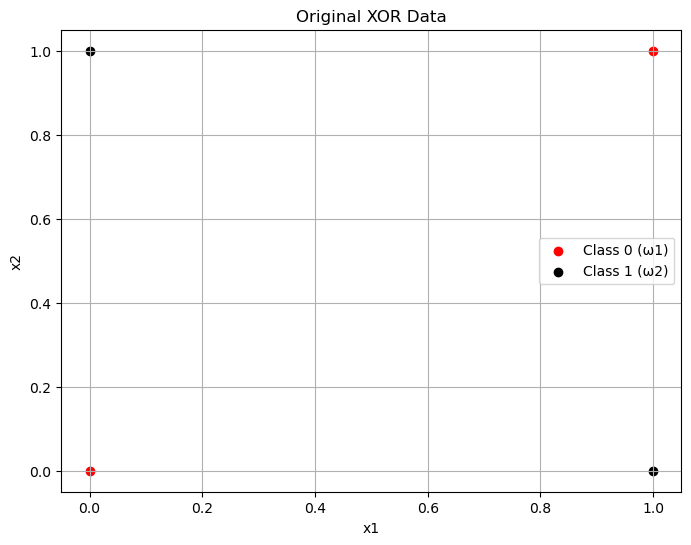

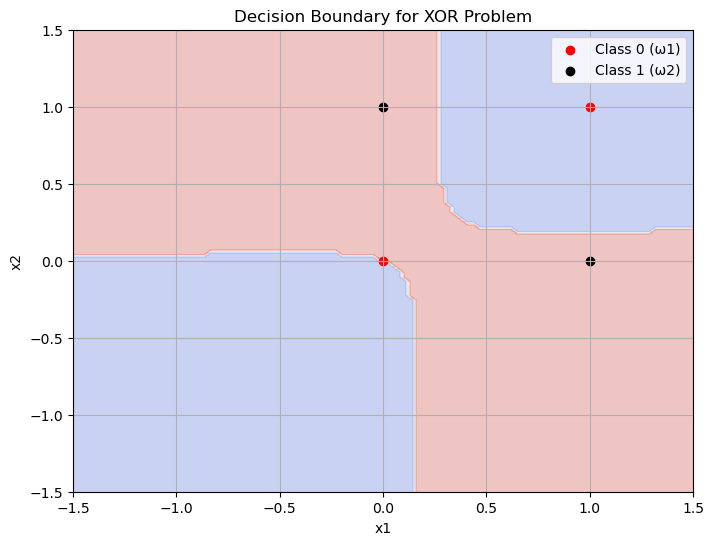

In [5]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# XOR function to create the dataset
def generate_xor_data():
    # XOR problem with 2 input variables and binary outputs
    # Format: (x1, x2) -> label
    return [
        ([1, 1], 0),
        ([1, 0], 1),
        ([0, 1], 1),
        ([0, 0], 0)
    ]

# Mapping XOR data to a higher-dimensional space
def map_to_higher_dimension(x1, x2):
    return [
        x1,  # original x1
        x2,  # original x2
        x1**2,  # x1 squared
        x2**2,  # x2 squared
        2*x1*x2  # interaction term (x1 * x2)
    ]

# Linear machine classifier for multiclass classification
class LinearMachine:
    def __init__(self, num_classes, dim):
        self.num_classes = num_classes
        self.dim = dim
        # Initialize weight vectors for each class (weights are random for simplicity)
        self.weights = [[random.uniform(-1, 1) for _ in range(dim)] for _ in range(num_classes)]
    
    def predict(self, x):
        # Predict the class with the highest score (discriminant function)
        scores = [sum(w * xi for w, xi in zip(self.weights[i], x)) for i in range(self.num_classes)]
        return scores.index(max(scores))  # Class with highest score
    
    def update_weights(self, x, true_class, predicted_class, learning_rate=1.0):
        # Update weights based on the fixed-increment rule (if misclassification occurs)
        for i in range(self.num_classes):
            if i == true_class:
                self.weights[i] = [w + learning_rate * xi for w, xi in zip(self.weights[i], x)]
            elif i == predicted_class:
                self.weights[i] = [w - learning_rate * xi for w, xi in zip(self.weights[i], x)]

# Function to train a linear machine with the fixed-increment rule
def train_linear_machine(data, num_classes, epochs=100):
    # Number of features (including the original and mapped features)
    dim = 5  # Because of the 5 mapped features in the XOR case (x1, x2, x1^2, x2^2, 2*x1*x2)
    
    # Initialize the linear machine
    machine = LinearMachine(num_classes, dim)
    
    # Training loop (epochs)
    for epoch in range(epochs):
        # Shuffle data for stochastic training
        random.shuffle(data)
        
        # Go through each sample in the dataset
        for (x, true_class) in data:
            x_mapped = map_to_higher_dimension(x[0], x[1])
            predicted_class = machine.predict(x_mapped)
            
            if predicted_class != true_class:
                # Update weights if there is a misclassification
                machine.update_weights(x_mapped, true_class, predicted_class)
                
    return machine

# Function to test the linear machine
def test_machine(machine, data):
    correct_predictions = 0
    for (x, true_class) in data:
        x_mapped = map_to_higher_dimension(x[0], x[1])
        predicted_class = machine.predict(x_mapped)
        if predicted_class == true_class:
            correct_predictions += 1
    accuracy = correct_predictions / len(data)
    return accuracy

# Generate XOR data
xor_data = generate_xor_data()

# Train the machine (using a 2-class XOR dataset but can be generalized to multiclass problems)
num_classes = 2  # For XOR, we have two classes: 0 and 1
epochs = 100  # Number of training epochs
machine = train_linear_machine(xor_data, num_classes, epochs)

# Test the machine
accuracy = test_machine(machine, xor_data)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

# Plotting the XOR data in the original space (x1, x2)
x1_vals = [x[0][0] for x in xor_data]
x2_vals = [x[0][1] for x in xor_data]
labels = [x[1] for x in xor_data]

# Separate points by class (0 or 1)
class_0 = [(x[0][0], x[0][1]) for x in xor_data if x[1] == 0]
class_1 = [(x[0][0], x[0][1]) for x in xor_data if x[1] == 1]

# Create a scatter plot for the original XOR data
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*class_0), color='red', label='Class 0 (ω1)')
plt.scatter(*zip(*class_1), color='black', label='Class 1 (ω2)')

plt.title('Original XOR Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

# Now, let's plot the decision boundary in the original space.
# We'll sample the 2D space to visualize how the model would classify each region.

# Create a grid of points
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))

# Predict the class for each point in the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_mapped = [map_to_higher_dimension(x[0], x[1]) for x in grid_points]
predictions = [machine.predict(x) for x in grid_mapped]

# Reshape predictions back to grid shape
predictions = np.array(predictions).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(*zip(*class_0), color='red', label='Class 0 (ω1)')
plt.scatter(*zip(*class_1), color='black', label='Class 1 (ω2)')

plt.title('Decision Boundary for XOR Problem')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()


### Solution to the Minimization Problem

Let $ B_i $ be a matrix where all elements are zero except for those in the $ i $-th column, which are unity. The trace of the "squared" error matrix $ (YA - B)^t \times (YA - B) $ is minimized by the solution:

$$
A = Y^\dagger B \tag{120}
$$

where $ Y^\dagger $ denotes the pseudoinverse of $ Y $.

### Generalization of the Solution

This result can be generalized in a theoretically interesting fashion. Let $ \lambda_{ij} $ be the loss incurred for deciding $ \omega_i $ when the true state of nature is $ \omega_j $. Let the $ j $-th submatrix of $ B $ be given by:

$$
B_j = 
\begin{bmatrix}
\lambda_{1j} & \lambda_{2j} & \cdots & \lambda_{cj} \\
\lambda_{1j} & \lambda_{2j} & \cdots & \lambda_{cj} \\
\vdots & \vdots & \ddots & \vdots \\
\lambda_{1j} & \lambda_{2j} & \cdots & \lambda_{cj}
\end{bmatrix}, \quad j = 1, \ldots, c
$$

Then, as the number of samples approaches infinity, the solution $ A = Y^\dagger B $ yields discriminant functions $ a_i^t y $, which provide a minimum-mean-square-error approximation to the Bayes discriminant function:

$$
g_i^0 = - \sum_{j=1}^{c} \lambda_{ij} P(\omega_i | x) \tag{122}
$$

The proof of this is a direct extension of the proof given in Section 5.8.3 (Problem 34).

### Summary

This chapter considers discriminant functions that are linear functions of a set of parameters, generally called weights. In all two-category cases, such discriminants lead to hyperplane decision boundaries, either in the feature space itself, or in a space where the features have been mapped by a nonlinear function (general linear discriminants).

In broad overview, techniques such as the Perceptron algorithm adjust the parameters to increase the inner product with patterns in category $ \omega_1 $ and decrease the inner product with those in $ \omega_2 $. A very general approach is to form some criterion function and perform gradient descent. Different criterion functions have different strengths and weaknesses related to computation and convergence, and none uniformly dominates the others.

One can use linear algebra to solve for the weights (parameters) directly, by means of pseudoinverse matrices for small problems. In Support Vector Machines, the input is mapped by a nonlinear function to a high-dimensional space, and the optimal hyperplane is found, the one that has the largest margin. The support vectors are those (transformed) patterns that determine the margin; they are informally the hardest patterns to classify, and the most informative ones for designing the classifier. An upper bound on the expected error rate of the classifier depends linearly upon the expected number of support vectors.

For multi-category problems, the linear machines create decision boundaries consisting of sections of such hyperplanes. One can prove convergence of multi-category methods by using a general approach that reduces the multi-category problem to a series of two-category problems.


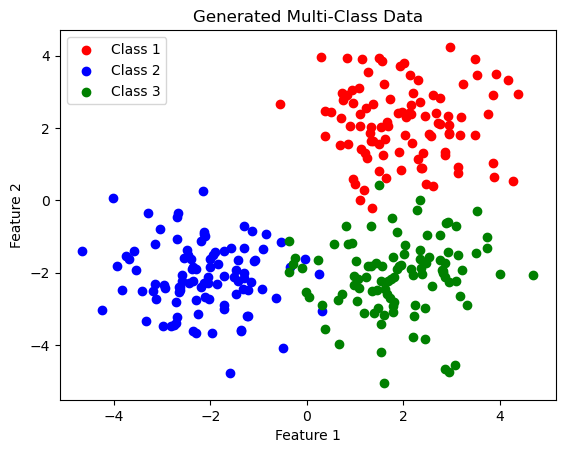

ValueError: shapes (3,) and (300,) not aligned: 3 (dim 0) != 300 (dim 0)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for a multi-class problem (3 classes in this case)
np.random.seed(0)

# Class 1 (Red), Class 2 (Blue), and Class 3 (Green)
n_samples = 100
X_class1 = np.random.randn(n_samples, 2) + np.array([2, 2])
X_class2 = np.random.randn(n_samples, 2) + np.array([-2, -2])
X_class3 = np.random.randn(n_samples, 2) + np.array([2, -2])

X = np.vstack([X_class1, X_class2, X_class3])
y = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

# Plot the data points
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], color='blue', label='Class 2')
plt.scatter(X_class3[:, 0], X_class3[:, 1], color='green', label='Class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Multi-Class Data')
plt.legend()
plt.show()

# Construct the matrix Y with a bias term (adding column of ones to X)
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Adding a bias term
Y = X_bias.T  # Transpose of the design matrix

# Creating the matrix B using a dummy loss matrix (for simplicity, we assume a loss matrix where λ_ij = 1 for all i ≠ j)
lambda_matrix = np.ones((3, 3)) - np.eye(3)  # Identity matrix subtracted from a ones matrix
B = np.zeros((3, X.shape[0]))
for i in range(3):
    B[i] = lambda_matrix[i].dot(np.ones((X.shape[0],)))

# Pseudoinverse calculation
Y_pseudo_inv = np.linalg.pinv(Y.T)  # Pseudoinverse of Y
A = Y_pseudo_inv @ B

# Calculate the discriminant functions (this is a simple implementation)
def discriminant_function(x, A):
    return A @ x.T

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.array([discriminant_function(np.array([1, xi, yi]), A) for xi, yi in zip(xx.ravel(), yy.ravel())])
Z = np.argmax(Z, axis=1).reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.RdYlBu)
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], color='blue', label='Class 2')
plt.scatter(X_class3[:, 0], X_class3[:, 1], color='green', label='Class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Multi-Class Classification')
plt.legend()
plt.show()


In [ ]:
def matrix_multiply(A, B):
    """Multiplies two matrices A and B."""
    result = []
    for i in range(len(A)):
        row = []
        for j in range(len(B[0])):
            sum_val = 0
            for k in range(len(B)):
                sum_val += A[i][k] * B[k][j]
            row.append(sum_val)
        result.append(row)
    return result

def transpose_matrix(A):
    """Returns the transpose of matrix A."""
    return [list(row) for row in zip(*A)]

def inverse_matrix(A):
    """Computes the inverse of a 2x2 matrix A."""
    determinant = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    if determinant == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")
    # 2x2 matrix inverse formula
    return [[A[1][1] / determinant, -A[0][1] / determinant],
            [-A[1][0] / determinant, A[0][0] / determinant]]

def matrix_vector_multiply(M, v):
    """Multiplies matrix M with vector v."""
    result = []
    for row in M:
        result.append(sum(x * y for x, y in zip(row, v)))
    return result

def compute_discriminant(Y, B):
    """Computes the discriminant weights A using the formula A = Y_inv * B."""
    Y_inv = inverse_matrix(Y)  # Inverting Y
    return matrix_multiply([Y_inv], B)  # Multiplying Y_inv with B

def compute_loss_matrix(λ, c):
    """Generate a loss matrix B based on λ (losses) and c (number of categories)."""
    B = [[λ[i][j] for j in range(c)] for i in range(c)]
    return B

def discriminant_function(A, Y):
    """Computes the discriminant function g_i(x) = a_i^T * x."""
    return matrix_vector_multiply(A, Y)

# Example data
# Feature matrix Y (3 samples, 2 features)
Y = [[1, 2], 
     [3, 4]]

# Target matrix B (3 samples, 2 classes)
B = [[1, 0],
     [0, 1],
     [1, 0]]

# Step 1: Compute the discriminant weights A
A = compute_discriminant(Y, B)

# Step 2: Create a loss matrix λ (for simplicity, assume a random loss matrix)
λ = [[0, 1], [1, 0]]  # Example loss matrix for 2 categories
B_loss = compute_loss_matrix(λ, 2)

# Step 3: Compute the discriminant functions
g = discriminant_function(A, Y)

# Print results
print("Weights A:")
for row in A:
    print(row)

print("Discriminant functions:")
print(g)

print("Loss matrix B:")
for row in B_loss:
    print(row)
